# Convex Optimization
## Tutorial 7
### Tanmay Garg CS20BTECH11063

In [157]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math

In [158]:
from pv_output_data import *

In [159]:
total_num = 24 * 12
val_lambda = 1

In [160]:
#Variables of size T x 1
c = cp.Variable(T)
s = cp.Variable(T)
r = cp.Variable(T)


In [161]:
#Laplacian to calculate the smoothness of c
Laplacian_C = 0
for i in range(1, total_num):
    Laplacian_C += cp.square(c[i-1] - c[i])

Laplacian_C += cp.square(c[total_num-1] - c[0])


In [162]:
MyObjective = cp.Minimize(Laplacian_C + val_lambda * np.ones(T) @ s)
MyConstraints = [
    s >= 0,
    c >= 0,
    p == c - s + r,
    s <= c,
    cp.norm(r, 1) / T <= 4.0
]


In [163]:
for t in range(T - total_num):
    MyConstraints += [c[t + total_num] == c[t]]

In [164]:
MyProblem = cp.Problem(MyObjective, MyConstraints)
Op_value = MyProblem.solve()
print("The optimal value of the function: {}".format(Op_value))

The optimal value of the function: 98130.29461447048


In [165]:
print("The average value of s: {}".format((np.mean(s.value))))
print("The average value of c: {}".format(np.mean(c.value)))
print("The average value of p: {}".format(np.mean(p)))
print("The average absolute value of r: {}".format(np.mean(np.abs(r.value))))

The average value of s: 4.478406110661431
The average value of c: 529.5158667139498
The average value of p: 529.0375009330357
The average absolute value of r: 4.000349357587738


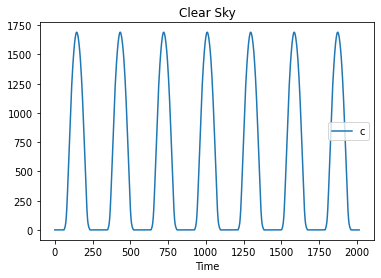

In [166]:
plt.figure()
plt.plot(np.arange(T), c.value, label='c')
plt.xlabel('Time')
plt.title('Clear Sky')
plt.legend()
plt.show()

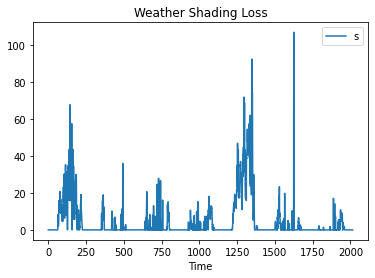

In [167]:
plt.figure()
plt.plot(np.arange(T), s.value, label='s')
plt.xlabel('Time')
plt.title('Weather Shading Loss')
plt.legend()
plt.show()

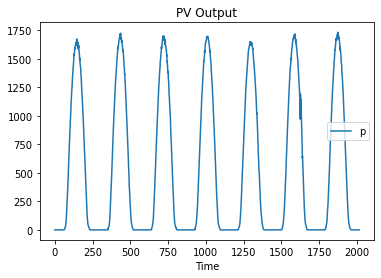

In [168]:
plt.figure()
plt.plot(np.arange(T), p, label='p')
plt.xlabel('Time')
plt.title('PV Output')
plt.legend()
plt.show()

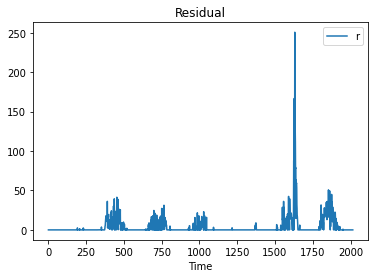

In [169]:
plt.figure()
plt.plot(np.arange(T), r.value, label='r')
plt.xlabel('Time')
plt.title('Residual')
plt.legend()
plt.show()